In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rootPath = '/content/drive/MyDrive/Computer_Vision_Features_FUM/'

In [4]:
harris = cv2.imread(rootPath + 'Images/harris.JPG')
harris = cv2.cvtColor(harris, cv2.COLOR_BGR2RGB)
harris = np.array(harris)

sl = cv2.imread(rootPath + 'Images/sl.jpg')
sl = cv2.cvtColor(sl, cv2.COLOR_BGR2RGB)
sl = np.array(sl)

sm = cv2.imread(rootPath + 'Images/sm.jpg')
sm = cv2.cvtColor(sm, cv2.COLOR_BGR2RGB)
sm = np.array(sm)

sr = cv2.imread(rootPath + 'Images/sr.jpg')
sr = cv2.cvtColor(sr, cv2.COLOR_BGR2RGB)
sr = np.array(sr)


In [5]:
def subplot(rows_count, column_count, images, titles):
    for i in range(len(images)):
        plt.subplot(rows_count, column_count, i+1)
        plt.title(titles[i])
        plt.imshow(images[i], cmap='gray')


In [6]:
def plot_image(image, title=''):
    plt.imshow(image)
    plt.title(title)
    plt.show()


7.Features  
7.1.Harris Corner Detector

7.1.1. Extract interest points using the Harris Corner detector that you implemented. In this way, apply the Harris Corner detector for at least 4 different scales. Which interest points do you observe to be detected across all these different scales? Notice that your implementation should allow for any suitable scale as input, however you can show results on a minimum of 4 different scales (Test on harris.JPG Image).

In [7]:
def harris_corner_detector(img, window_size, k, threshold):
    # copy the image in an new array
    img = np.array(img)

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    img_gaussian = cv2.GaussianBlur(gray, (3, 3), 0)

    height = img.shape[0]  # .shape[0] outputs height
    # .shape[1] outputs width .shape[2] outputs color channels of image

    width = img.shape[1]
    matrix_R = np.zeros((height, width))

    # Step 1 - Calculate the x e y image derivatives (dx e dy)
    dx = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize=3)
    # dy, dx = np.gradient(gray)

    #   Step 2 - Calculate product and second derivatives (dx2, dy2 e dxy)
    dx2 = np.square(dx)
    dy2 = np.square(dy)
    dxy = dx*dy

    offset = int(window_size / 2)
    #   Step 3 - Calcular a soma dos produtos das derivadas para cada pixel (Sx2, Sy2 e Sxy)

    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            Sx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])

            #   Step 4 - Define the matrix H(x,y)=[[Sx2,Sxy],[Sxy,Sy2]]
            H = np.array([[Sx2, Sxy], [Sxy, Sy2]])

            #   Step 5 - Calculate the response function ( R=det(H)-k(Trace(H))^2 )
            det = np.linalg.det(H)
            tr = np.matrix.trace(H)
            R = det-k*(tr**2)
            matrix_R[y-offset, x-offset] = R

    #   Step 6 - Apply a threshold
    cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            value = matrix_R[y, x]
            if value > threshold:
                # cornerList.append([x, y, value])
                cv2.circle(img, (x, y), 3, (0, 255, 0))

    return img

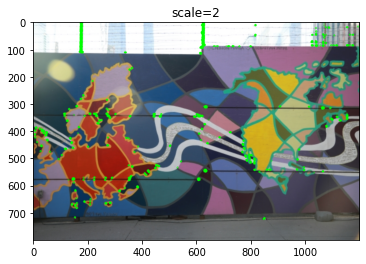

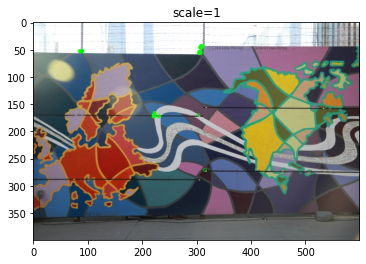

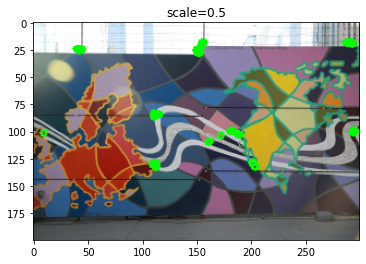

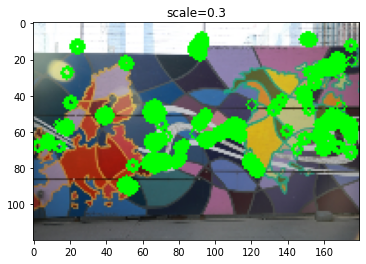

In [8]:
scales = [2, 1, 0.5, 0.3]
for scale in scales:
    copy_img = np.array(harris)
    img_scaled = cv2.resize(copy_img, None, fx=scale, fy=scale)
    harris_with_key_points = harris_corner_detector(
        img_scaled, window_size=5, k=0.04, threshold=0.30)
    plot_image(harris_with_key_points, 'scale='+str(scale))


7.2. Scene stitching with SIFT/SURF features  
7.2.1. Use the OpenCV, Python, and MATLAB implementation of the SIFT or SURF operator to find interest points and establish correspondences between the images. In this case you can directly compare the feature vectors of interest points. You will match and align between different views of a scene with SIFT/SURF features. Discuss results and demonstrates the output of each method separately (Test on sl,sm,sr.jpg images).

In [9]:
def detect_SIFT_key_points(image):
    # Converting image to grayscale
  gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
  # Applying SIFT detector
  sift = cv2.xfeatures2d.SIFT_create() 
  kp = sift.detect(gray, None)
    
  # Marking the keypoint on the image using circles
  image = cv2.drawKeypoints(gray,
                        kp,
                        image,
                        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
  return image

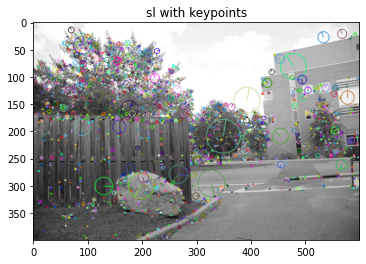

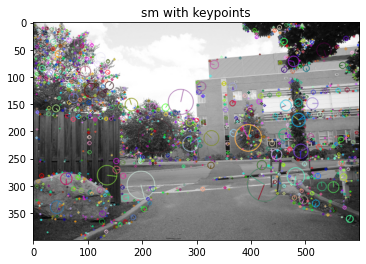

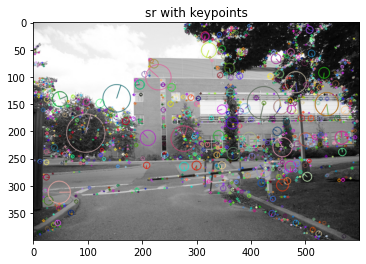

In [ ]:
sl_with_key_points = detect_SIFT_key_points(sl)
cv2.imwrite(rootPath + 'Outputs/7.2/7.2.1/sl-with-keypoints.jpg', sl_with_key_points)
plot_image(sl_with_key_points, 'sl with keypoints')

sm_with_key_points = detect_SIFT_key_points(sm)
cv2.imwrite(rootPath + 'Outputs/7.2/7.2.1/sm-with-keypoints.jpg', sm_with_key_points)
plot_image(sm_with_key_points, 'sm with keypoints')

sr_with_key_points = detect_SIFT_key_points(sr)
cv2.imwrite(rootPath + 'Outputs/7.2/7.2.1/sr-with-keypoints.jpg', sr_with_key_points)
plot_image(sr_with_key_points, 'sr with keypoints')

In [ ]:
def establish_SIFT_correspondences(image1, image2, n):

  # Convert the images to grayscale
  gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

  # Create SIFT objects
  sift = cv2.xfeatures2d.SIFT_create()

  # Detect keypoints and compute descriptors for both images
  keypoints1, descriptor1 = sift.detectAndCompute(gray1, None)
  keypoints2, descriptor2 = sift.detectAndCompute(gray2, None)

  # Create a brute-force matcher object
  bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

  # Match the descriptors
  matches = bf.match(descriptor1, descriptor2)

  # Sort the matches by distance
  matches = sorted(matches, key=lambda x: x.distance)

  image_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:n], image2, flags=2)
  return image_matches


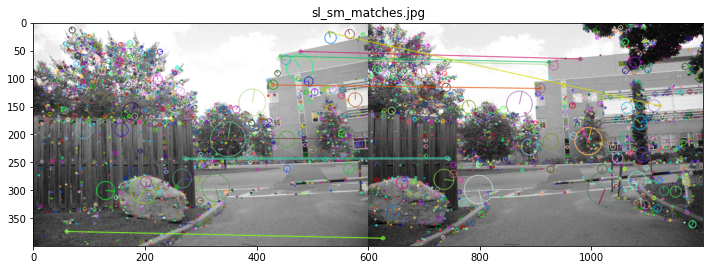

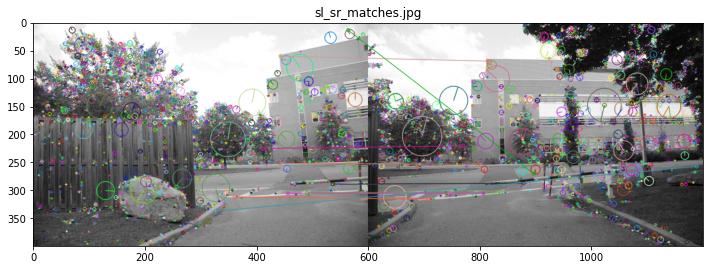

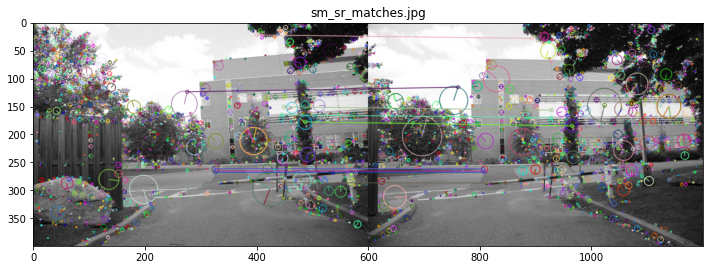

True

In [ ]:
  image_matches = establish_SIFT_correspondences(sl,sm,10)
  plt.figure(figsize=(12,8))
  plot_image(image_matches, 'sl_sm_matches.jpg')
  cv2.imwrite(rootPath + 'Outputs/7.2/7.2.1/sl_sm_matches.jpg', image_matches)

  image_matches = establish_SIFT_correspondences(sl,sr,10)
  plt.figure(figsize=(12,8))
  plot_image(image_matches, 'sl_sr_matches.jpg')
  cv2.imwrite(rootPath + 'Outputs/7.2/7.2.1/sl_sr_matches.jpg', image_matches)

  image_matches = establish_SIFT_correspondences(sm,sr,10)
  plt.figure(figsize=(12,8))
  plot_image(image_matches, 'sm_sr_matches.jpg')
  cv2.imwrite(rootPath + 'Outputs/7.2/7.2.1/sm_sr_matches.jpg', image_matches)


In [ ]:
def detect_SURF_key_points(image):
    # Converting image to grayscale
  gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
  # Applying SIFT detector
  surf = cv2.xfeatures2d_SURF.create(400)
  kp, decriptor = surf.detectAndCompute(gray,None)

    
  # Marking the keypoint on the image using circles
  image = cv2.drawKeypoints(gray,
                        kp,
                        image,
                        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
  return image

In [ ]:
sl_with_key_points = detect_SURF_key_points(sl)
cv2.imwrite(rootPath + 'Outputs/7.2/7.2.1/SURF/sl-with-keypoints.jpg', sl_with_key_points)
plot_image(sl_with_key_points, 'sl with keypoints')

sm_with_key_points = detect_SURF_key_points(sm)
cv2.imwrite(rootPath + 'Outputs/7.2/7.2.1/SURF/sm-with-keypoints.jpg', sm_with_key_points)
plot_image(sm_with_key_points, 'sm with keypoints')

sr_with_key_points = detect_SURF_key_points(sr)
cv2.imwrite(rootPath + 'Outputs/7.2/7.2.1/SURF/sr-with-keypoints.jpg', sr_with_key_points)
plot_image(sr_with_key_points, 'sr with keypoints')